In [1]:
import punk
help(punk)

Help on package punk:

NAME
    punk

PACKAGE CONTENTS
    feature_selection (package)
    utils (package)

DATA
    __all__ = ['feature_selection', 'utils']

VERSION
    0.1.3dev1

FILE
    /home/alarcj/Documents/datasci/NewKnowledge/primitives_repo/CODE/examples/punk/__init__.py




In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from punk import feature_selection

# Feature Selection for Classification Problems

In [3]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                      'python-machine-learning-book/master/code/datasets/wine/wine.data', 
                      header=None)    
columns = np.array(['Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                    'Proline'])
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values            
X, _, y, _ = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
%%time
rfc = punk.feature_selection.rf.rfclassifier_feature_selection(X, y)
print(rfc.keys())

dict_keys(['indices', 'feature_importances'])
CPU times: user 45 s, sys: 84 ms, total: 45.1 s
Wall time: 45.6 s


 1)        Color intensity         0.17600
 2)            Proline             0.16426
 3)           Flavanoids           0.14943
 4)  OD280/OD315 of diluted wines  0.14081
 5)            Alcohol             0.10759
 6)              Hue               0.07522
 7)         Total phenols          0.05475
 8)       Alcalinity of ash        0.03159
 9)           Malic acid           0.02552
10)        Proanthocyanins         0.02376
11)           Magnesium            0.02217
12)      Nonflavanoid phenols      0.01659
13)              Ash               0.01231


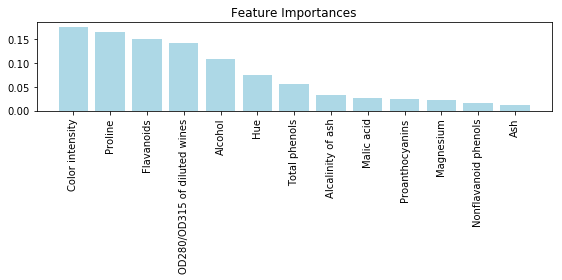

In [7]:
feature_importances = rfc["feature_importances"]
feature_indices = rfc["indices"]

for i in range(len(columns)):
    print("{:>2}) {:^30} {:.5f}".format(i+1, 
                                        columns[feature_indices[i]],
                                        feature_importances[feature_indices[i]]
                                       ))
    
plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.bar(range(len(columns)), feature_importances[feature_indices], color='lightblue', align='center')

plt.xticks(range(len(columns)), columns[feature_indices], rotation=90)
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()